<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_BEST_sample_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 40

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 464 (delta 102), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (464/464), 166.11 MiB | 29.54 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 201 (delta 86), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (201/201), 211.75 MiB | 24.09 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Checking out files: 100% (52/52), done.
/content/Doutorado/MarquesGabi_Routines


In [10]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 201 (delta 86), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (201/201), 211.75 MiB | 23.04 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Checking out files: 100% (52/52), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [13]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [14]:
Img_Size = 28

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 151ms/step - loss: 0.7274 - accuracy: 0.7347 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 125ms/step - loss: 0.3936 - accuracy: 0.8017 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 127ms/step - loss: 0.3122 - accuracy: 0.8688 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 129ms/step - loss: 0.2133 - accuracy: 0.9300 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 128ms/step - loss: 0.1614 - accuracy: 0.9329 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0894 - accuracy: 0.9679 - val_loss: 0.6935 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 128ms/step - loss: 0.0814 - accuracy: 0.9679 - val_loss: 0.6932 - val_accuracy: 0.4898

In [17]:
Y_test = yback(Y_test)

In [18]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.51      1.00      0.68        75

    accuracy                           0.51       147
   macro avg       0.26      0.50      0.34       147
weighted avg       0.26      0.51      0.34       147



In [20]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
Sample3 =[0, 3, 9] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [22]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,99.082436,100.500847,103.527435,106.663185,111.310974,117.033173,119.828094,114.582550,68.404053,60.649975,59.055763,60.614456,56.032204,47.257103,47.631493,50.638077,51.917465,51.787895,51.810616,52.059269,52.060070,52.757591,53.150517,53.902035,56.495098,56.419323,54.643150,50.673424,99.359131,99.250084,101.213036,104.688515,109.137482,117.710312,122.831337,109.231873,64.814491,63.233025,61.645828,63.234455,...,107.815186,108.771988,110.397903,112.749870,112.828957,120.650467,148.355789,69.616158,61.206318,65.829124,66.029228,65.357307,84.239403,89.281731,92.936615,97.178581,102.640282,105.690147,107.432449,113.008659,122.065025,119.903831,106.700317,95.411278,95.358818,103.384132,102.865845,101.790558,108.787498,110.436066,110.247940,112.010246,114.632629,116.383636,140.436630,86.821274,60.481468,66.202072,65.385246,66.737305
1,36.432102,38.111111,36.345676,36.246910,37.641975,35.666664,34.987656,36.049385,36.765430,37.061729,35.950619,36.987656,38.543213,40.469143,41.518517,42.753086,42.543213,51.827164,99.407417,112.641968,109.444443,104.530869,104.012344,104.456787,106.024696,110.765434,118.086411,123.567902,42.160496,40.728401,37.728394,36.790123,36.802471,35.123459,34.345680,34.765430,35.802467,36.740738,36.814819,37.802475,...,0.000000,0.000000,0.197531,0.000000,0.098765,0.074074,0.148148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086420,2.209877,3.320988,0.358025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098765,0.345679,0.123457,0.839506,0.098765,0.000000,0.000000,0.000000,0.000000
2,91.396652,92.909775,93.514503,93.410477,93.036758,94.323814,93.569366,92.953079,98.692909,108.433273,115.749428,129.652130,150.474136,162.989838,177.554291,63.723511,26.682137,38.446560,39.231277,38.348473,37.245888,36.866745,38.684181,38.771431,42.885719,48.261753,61.897682,67.156067,93.771568,95.176544,95.550079,93.589470,91.263474,92.194664,94.838982,95.244827,97.046005,107.218399,116.606186,131.989761,...,135.666473,140.420654,144.519455,148.642151,151.641037,154.187515,158.245163,154.799469,150.937210,148.613861,141.266785,100.929543,23.564480,29.890739,42.342590,72.177338,94.809311,103.633682,105.594429,107.819565,106.955978,108.849045,111.200882,114.212708,117.945000,121.121826,127.844803,131.857101,132.926575,140.566864,144.376297,149.467987,151.615387,152.456284,153.047333,154.015930,156.087723,156.850616,156.172852,153.181381
3,100.830452,102.103806,108.089958,107.356407,106.380623,104.761246,97.076126,87.712807,87.456749,86.709343,85.903114,79.972321,68.505196,64.768166,61.792389,62.498272,65.173012,68.294121,69.965401,71.515572,72.162636,70.529411,69.418678,71.474052,73.858131,76.051910,78.702423,74.128029,106.837364,104.470589,112.366776,125.460197,107.847755,104.166092,97.608994,89.685120,88.072662,87.214539,84.269897,78.048447,...,31.069206,32.453285,34.754326,37.349483,39.159168,40.868515,41.546715,41.138409,40.664360,39.743942,38.961937,36.782009,57.384087,54.782009,55.498268,55.920418,57.217991,58.837368,61.581314,63.955017,58.854675,31.788929,15.615916,15.636678,16.546715,21.377165,27.598616,32.262978,33.290657,33.913498,36.359863,39.231834,41.110725,42.252594,41.975780,41.276817,41.335640,40.788929,38.823532,37.723186
4,54.351616,73.844467,87.849373,99.285072,98.535522,95.945152,93.682770,81.470634,46.668465,52.288353,57.668293,74.432190,82.122566,85.040756,83.370895,83.167206,83.159729,85.841347,89.677048,93.253700,99.899612,83.089920,7.013200,6.488531,16.629332,40.221115,45.161648,45.303902,84.472771,92.097023,93.706604,97.327354,97.010719,85.776161,81.309074,64.834129,52.001030,57.288223,71.707596,84.875099,...,31.156693,24.479603,14.432313,11.48

In [23]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [24]:
#df_ann

In [25]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [26]:
img_graos.shape

(109, 785)

In [27]:
prediction

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [28]:
img_graos.shape

(109, 785)

In [29]:
Width=np.array(Width_new)

In [30]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 839, done.
remote: Counting objects: 100% (600/600), done.
remote: Compressing objects: 100% (598/598), done.
remote: Total 839 (delta 392), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (839/839), 6.27 MiB | 10.79 MiB/s, done.
Resolving deltas: 100% (529/529), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [31]:
#https://github.com/marquesgabi/Doutorado/blob/master/Amostra7.csv
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado
#%cd marquesgabi_out_2020
%cd Doutorado
PSD_imageJ = 'Amostra8.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

#PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

Cloning into 'Doutorado'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 464 (delta 102), reused 4 (delta 3), pack-reused 250
Receiving objects: 100% (464/464), 166.12 MiB | 30.54 MiB/s, done.
Resolving deltas: 100% (225/225), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
     ;Area
0  1;0.807
1  2;1.407
2  3;1.177


''

In [32]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [33]:
Width.shape

(109,)

In [34]:
img_graos.shape

(109, 785)

In [35]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,173.0,99.082436,100.500847,103.527435,106.663185,111.310974,117.033173,119.828094,114.582550,68.404053,60.649975,59.055763,60.614456,56.032204,47.257103,47.631493,50.638077,51.917465,51.787895,51.810616,52.059269,52.060070,52.757591,53.150517,53.902035,56.495098,56.419323,54.643150,50.673424,99.359131,99.250084,101.213036,104.688515,109.137482,117.710312,122.831337,109.231873,64.814491,63.233025,61.645828,...,107.815186,108.771988,110.397903,112.749870,112.828957,120.650467,148.355789,69.616158,61.206318,65.829124,66.029228,65.357307,84.239403,89.281731,92.936615,97.178581,102.640282,105.690147,107.432449,113.008659,122.065025,119.903831,106.700317,95.411278,95.358818,103.384132,102.865845,101.790558,108.787498,110.436066,110.247940,112.010246,114.632629,116.383636,140.436630,86.821274,60.481468,66.202072,65.385246,66.737305
3,119.0,100.830452,102.103806,108.089958,107.356407,106.380623,104.761246,97.076126,87.712807,87.456749,86.709343,85.903114,79.972321,68.505196,64.768166,61.792389,62.498272,65.173012,68.294121,69.965401,71.515572,72.162636,70.529411,69.418678,71.474052,73.858131,76.051910,78.702423,74.128029,106.837364,104.470589,112.366776,125.460197,107.847755,104.166092,97.608994,89.685120,88.072662,87.214539,84.269897,...,31.069206,32.453285,34.754326,37.349483,39.159168,40.868515,41.546715,41.138409,40.664360,39.743942,38.961937,36.782009,57.384087,54.782009,55.498268,55.920418,57.217991,58.837368,61.581314,63.955017,58.854675,31.788929,15.615916,15.636678,16.546715,21.377165,27.598616,32.262978,33.290657,33.913498,36.359863,39.231834,41.110725,42.252594,41.975780,41.276817,41.335640,40.788929,38.823532,37.723186
4,153.0,54.351616,73.844467,87.849373,99.285072,98.535522,95.945152,93.682770,81.470634,46.668465,52.288353,57.668293,74.432190,82.122566,85.040756,83.370895,83.167206,83.159729,85.841347,89.677048,93.253700,99.899612,83.089920,7.013200,6.488531,16.629332,40.221115,45.161648,45.303902,84.472771,92.097023,93.706604,97.327354,97.010719,85.776161,81.309074,64.834129,52.001030,57.288223,71.707596,...,31.156693,24.479603,14.432313,11.485670,12.014953,39.671154,67.243027,66.495796,64.108421,65.209793,68.492378,71.197754,54.765945,60.509804,58.711227,47.895382,38.751976,37.651890,37.242214,36.169979,34.573330,31.120724,31.395407,30.562305,29.509378,32.353325,40.821735,44.265881,43.228035,38.198341,25.381865,9.980692,13.410912,51.429970,70.944939,70.828918,65.401344,63.700714,67.391167,69.894577
5,195.0,81.250374,79.305641,78.144989,78.895439,80.518501,75.964661,65.282349,55.765396,65.510773,79.849968,80.573311,81.428589,83.644661,83.810028,84.614632,86.975975,87.970078,93.917854,100.895554,104.049423,99.261757,98.055550,97.303589,65.942017,53.909592,51.989590,53.987564,56.167767,80.957191,81.017044,80.258644,79.540802,73.402138,66.129242,45.977837,41.929184,57.260517,72.767891,77.093605,...,97.920670,101.223328,107.412735,111.715698,114.784912,114.262245,113.648331,106.231628,114.675789,127.392502,130.704422,71.230385,66.962349,60.348118,53.733810,48.982307,45.550041,38.514820,37.163712,33.410549,31.856255,40.843342,45.285339,57.374969,83.004211,88.840172,88.046867,93.126740,96.797462,101.055069,103.849823,107.065170,110.620758,114.921448,117.264893,113.079849,118.823654,135.256317,103.476067,57.606659
6,145.0,55.403519,58.154625,62.224781,74.458969,80.401283,83.168655,85.176453,87.205467,86.794670,86.361855,87.393814,88.226830,86.486176,81.156906,78.640572,71.440002,67.940979,60.377689,53.286659,50.818359,65.889610,72.512581,71.684662,71.036766,74.230820,74.214836,73.702110,71.507393,51.481804,55.870205,64.340363,77.208649,83.330559,86.689789,85.740829,87.979485,89.581169,89.365608,91.421875,...,101.275818,104.139351,113.983871,110.481377,

In [36]:
PSD_new.shape

(99, 1)

In [37]:
Diam1 =[]
'''
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]
'''


"\n# \nArea = df_ImgJ['Area'].values\n# Area = np.concatenate( (Area, [lost_value] ) )\n\nDiam1 = [ (4*A/np.pi)**0.5 for A in Area]\n"

In [38]:
len(Diameter_All)

109

In [39]:
A=PSD_new[';Area'].values
k = 0
Area2 = []
for i in A:
  if(A[k][2] == ';'):
    Area2.append(float(A[k][3:]))
  else:
      Area2.append(float(A[k][2:]))  
  k = k +1
print(Area2)

[0.807, 1.407, 1.177, 1.289, 1.743, 1.425, 2.553, 0.968, 1.43, 0.722, 1.235, 1.058, 1.342, 1.207, 1.682, 1.474, 1.997, 1.187, 2.082, 2.877, 1.386, 1.176, 0.96, 1.147, 1.02, 1.249, 1.704, 1.602, 1.303, 1.707, 2.264, 1.233, 0.84, 1.105, 1.343, 0.811, 2.03, 1.844, 2.266, 1.472, 1.009, 1.851, 0.941, 2.252, 1.269, 1.082, 1.065, 1.995, 2.063, 0.969, 1.389, 1.721, 1.355, 1.178, 1.529, 1.371, 1.423, 2.756, 0.854, 0.811, 0.69, 1.752, 0.978, 1.108, 1.149, 0.994, 1.594, 1.492, 1.322, 1.564, 1.29, 1.057, 1.193, 1.413, 1.477, 2.21, 1.27, 1.865, 1.088, 2.316, 1.855, 0.882, 1.587, 1.075, 2.179, 1.749, 0.957, 1.24, 1.586, 2.507, 1.864, 1.281, 2.137, 1.282, 2.097, 1.871, 1.315, 1.034, 2.095]


In [40]:
len(Area2)

99

In [41]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )

for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [42]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [43]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108
0,1.013659,1.338450,1.224174,1.281096,1.489717,1.346984,1.802937,1.110178,1.349345,0.958790,1.253974,1.160641,1.307168,1.239677,1.463417,1.369947,1.594572,1.229364,1.628154,1.913925,1.328424,1.223654,1.105581,1.208472,1.139607,1.261062,1.472956,1.428191,1.288034,1.474252,1.697826,1.252958,1.034177,1.186141,1.307655,1.016168,1.607693,1.532271,1.698576,1.369017,...,1.411151,1.281592,1.160092,1.232467,1.341301,1.371341,1.677456,1.271619,1.540971,1.176981,1.717214,1.536834,1.059716,1.421489,1.169928,1.665650,1.492279,1.103852,1.256510,1.421041,1.78662,1.540558,1.277114,1.649519,1.277612,1.634008,1.543448,1.293951,1.147401,1.633229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.209467,1.037028,0.781547,1.141569,0.898074,1.130326,0.781060,1.228702,0.961150,1.070606,1.302114,0.647039,1.263625,1.415682,1.323955,1.350608,0.999381,0.794729,1.029396,0.864306,1.171428,0.939337,0.974736,0.989464,1.178034,0.739896,0.731973,0.781648,0.869379,0.871113,0.584037,1.127664,1.105319,0.812586,0.882299,1.396361,1.070458,0.816894,1.075517,1.208600,...,1.005652,1.125674,1.022247,1.106080,1.155834,1.432723,0.992501,1.131798,1.432112,1.112039,1.091280,0.694080,0.851882,1.059973,0.966324,0.904946,0.934945,0.973499,0.903701,1.407110,0.63030,1.291639,0.813230,0.797967,1.399889,1.538036,0.770811,0.533226,1.308829,0.947557,0.952326,1.012197,1.317333,1.467121,1.277627,1.322137,1.048671,1.240992,0.74567,0.958572


In [44]:
Diameter_All

[1.2094672444454106,
 1.0370278315520283,
 0.7815467782613417,
 1.1415688046567898,
 0.8980742876170839,
 1.1303257272452458,
 0.7810600295379171,
 1.2287024134580757,
 0.9611500150100337,
 1.070605580567782,
 1.3021137077177298,
 0.6470388789280935,
 1.263624603683756,
 1.4156821688529266,
 1.3239549927632115,
 1.350608314791452,
 0.9993813079917083,
 0.7947288311248363,
 1.029395902719949,
 0.8643058013395672,
 1.171428480963255,
 0.9393368439457506,
 0.9747358199592148,
 0.9894635459375722,
 1.178033664916224,
 0.7398957563362759,
 0.7319729593862689,
 0.7816476789909745,
 0.8693794612898934,
 0.8711131444048813,
 0.5840373748905395,
 1.1276635494994995,
 1.1053192422464135,
 0.8125861331245107,
 0.8822994936135099,
 1.3963613873207665,
 1.070457608288839,
 0.8168941604639937,
 1.0755173482627605,
 1.2086000244299997,
 0.614029090092124,
 1.1567544760645625,
 0.9209519808477531,
 0.7669000687694331,
 0.7301498607661364,
 0.7278726253637513,
 1.1362686168298148,
 1.4299306616140384,


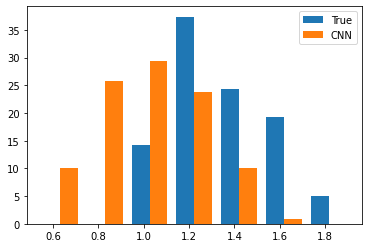

In [45]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [46]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3505581526276078 desvio= 0.2150949058846736 pontos= 99


In [47]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.0212658413938398 desvio= 0.23241404739536053 pontos= 109


In [48]:
# Software: media= 1.3185563233999378 desvio= 0.2728642468732428 pontos= 66 theshold =0.8 e repete=80
# Software: media= 1.2650227960747715 desvio= 0.22942393421076387 pontos= 20 theshold =0.5 e repete=40

In [49]:
np.mean(np.array(Diameter_All))

1.0212658413938398

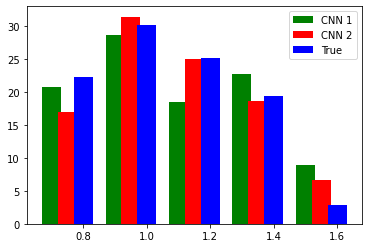

In [50]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])